<font color = 'green'><h1>Visualising my health data</h1></font>

**Description of notebook:**

This notebook will be very straight fowards. All I want to do is eye ball my health data, which will require using the xml parsing script. 

I will also produce lists of available data etc.

I will not include echocardiograms for now

**Outline:**
1. Loading data and viewing the variables available
2. x
3. x
4. x
5.  x


**Ticket:**  [link to ticket]

**Epic:** [link to epic]

**Author:** Fergus Currie 

**Date:** 11-10-2022

-------------


<br>

<font color = 'green'><h2>Helper Functions</h2></font>

In [1]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

def get_min_max_date_and_datetime_array(tmp):
    dates = []
    for i, row in tmp.iterrows():
        date = row['startDate'].split('-')
        year, month, day, hour, minute, sec = int(date[0]), int(date[1]), int(date[2].split(' ')[0]), int(date[2].split(' ')[1].split(':')[0]), int(date[2].split(' ')[1].split(':')[1]), int(date[2].split(' ')[1].split(':')[2])
        dates.append(datetime.datetime(year=year, month=month, day=day, hour=hour, minute=minute, second=sec))
    
    # find min
    min_date, max_date =  datetime.datetime.max, datetime.datetime.min
    for date in dates:
        if date < min_date:
            min_date = date
        if date > max_date:
            max_date = date
    min_date, max_date 
    
    return dates, min_date, max_date

<br>

<font color = 'green'><h2>1. Loading data and viewing the variables available</h2></font>

In [8]:
import os 
os.listdir()

NotADirectoryError: [Errno 20] Not a directory: '/home/fergus/data/project/apple_health_export2.csv'

In [9]:
df = pd.read_csv('/home/fergus/data/project/apple_health_export2.csv')
df

/tmp/ipykernel_329312/1753018479.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/fergus/data/project/apple_health_export2.csv')


,type,creationDate,startDate,endDate,value
0,HKQuantityTypeIdentifierHeight,2022-10-26 17:58:10 +1300,2022-10-26 17:58:10 +1300,2022-10-26 17:58:10 +1300,191.0
1,HKQuantityTypeIdentifierHeight,2022-10-26 18:23:44 +1300,2022-10-26 18:23:44 +1300,2022-10-26 18:23:44 +1300,192.0
2,HKQuantityTypeIdentifierBodyMass,2022-10-26 17:58:10 +1300,2022-10-26 17:58:10 +1300,2022-10-26 17:58:10 +1300,98.0
3,HKQuantityTypeIdentifierBodyMass,2022-10-26 18:23:44 +1300,2022-10-26 18:23:44 +1300,2022-10-26 18:23:44 +1300,97.0
4,HKQuantityTypeIdentifierBodyMass,2022-10-29 11:22:16 +1300,2022-10-29 11:22:16 +1300,2022-10-29 11:22:16 +1300,97.0
...,...,...,...,...,...
419707,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,2023-02-06 04:26:01 +1300,2023-02-06 04:25:00 +1300,2023-02-06 04:25:59 +1300,68.2195
419708,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,2023-02-06 06:25:59 +1300,2023-02-06 06:24:58 +1300,2023-02-06 06:25:57 +1300,32.1449
419709,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,2023-02-06 08:27:55 +1300,2023-02-06 08:26:54 +1300,2023-02-06 08:27:53 +1300,91.6374
419710,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,2023-02-06 10:29:39 +1300,2023-02-06 10:28:38 +1300,2023-02-06 10:29:38 +1300,111.984


**Comments on section 1:**

First off we can see that export_cda is a subset of export. This makes things a bit easier. The data is in a time series format. Taking HKCategoryTypeIdentifierSleepAnalysis as example, each data point is a point in time with values such as Core, REM, Deep, InBed. 


----------

<br>

<font color = 'green'><h2>2. Heart Rate - Starting Simple</h2></font>

The goal here is to convert all heart rate types from df into a nice pandas time series

In [8]:
df[df.type == "HKQuantityTypeIdentifierHeartRate"]

,type,creationDate,startDate,endDate,value
19,HKQuantityTypeIdentifierHeartRate,2022-10-26 18:01:09 +1300,2022-10-26 17:59:20 +1300,2022-10-26 17:59:20 +1300,72.0
20,HKQuantityTypeIdentifierHeartRate,2022-10-26 18:06:17 +1300,2022-10-26 18:01:49 +1300,2022-10-26 18:01:49 +1300,69.0
21,HKQuantityTypeIdentifierHeartRate,2022-10-26 18:07:24 +1300,2022-10-26 18:05:56 +1300,2022-10-26 18:05:56 +1300,88.7466
22,HKQuantityTypeIdentifierHeartRate,2022-10-26 18:13:19 +1300,2022-10-26 18:07:56 +1300,2022-10-26 18:07:56 +1300,86.0
23,HKQuantityTypeIdentifierHeartRate,2022-10-26 18:16:12 +1300,2022-10-26 18:12:34 +1300,2022-10-26 18:12:34 +1300,92.0
...,...,...,...,...,...
64685,HKQuantityTypeIdentifierHeartRate,2023-02-06 13:00:44 +1300,2023-02-06 12:59:37 +1300,2023-02-06 12:59:37 +1300,101.0
64686,HKQuantityTypeIdentifierHeartRate,2023-02-06 13:05:32 +1300,2023-02-06 13:01:27 +1300,2023-02-06 13:01:27 +1300,101.0
64687,HKQuantityTypeIdentifierHeartRate,2023-02-06 13:12:31 +1300,2023-02-06 13:09:14 +1300,2023-02-06 13:09:14 +1300,105.0
64688,HKQuantityTypeIdentifierHeartRate,2023-02-06 13:18:07 +1300,2023-02-06 13:11:41 +1300,2023-02-06 13:11:41 +1300,100.0


first look at heart rate 

/tmp/ipykernel_57009/3095414486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[:, "value"] = tmp.value.astype(float)
/tmp/ipykernel_57009/3095414486.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tmp.loc[:, "value"] = tmp.value.astype(float)


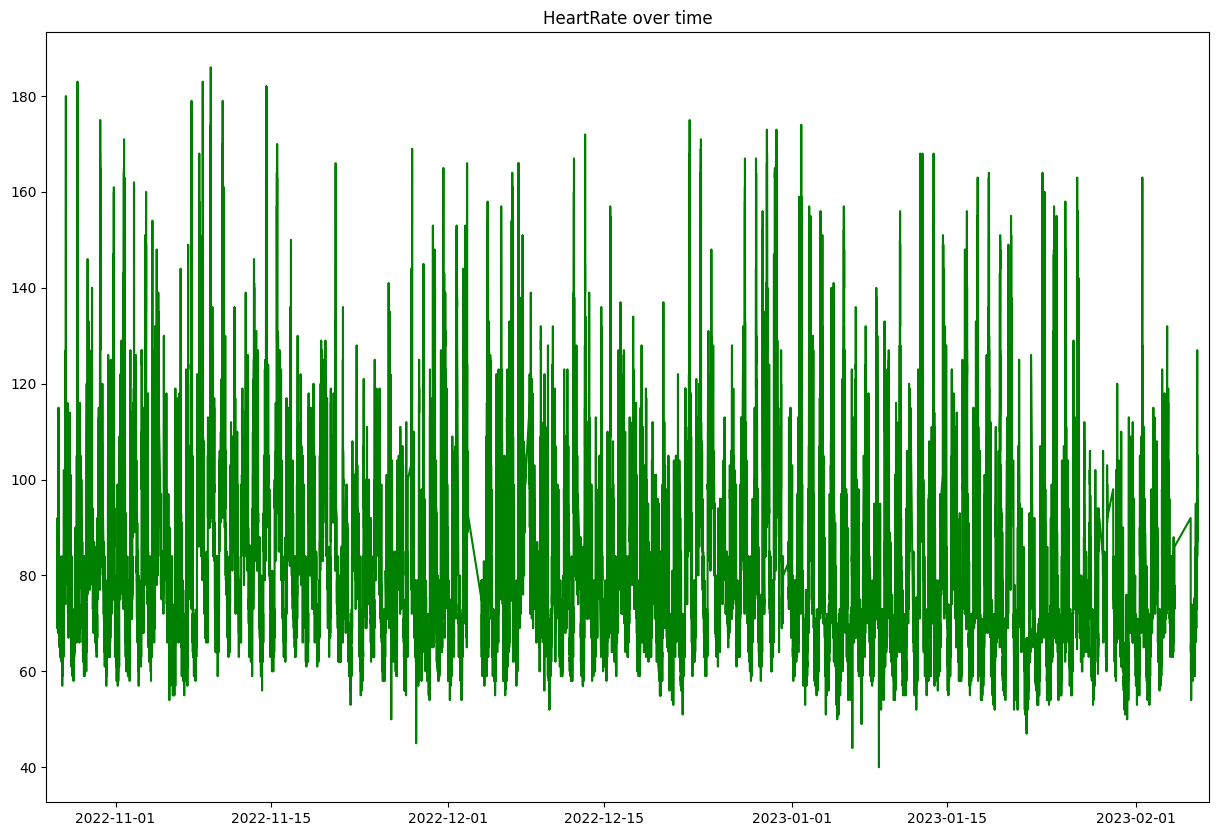

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
# slice df 
tmp = df[df.type == "HKQuantityTypeIdentifierHeartRate"]
tmp.loc[:, "value"] = tmp.value.astype(float)
# get date
dates, min_date, max_date = get_min_max_date_and_datetime_array(tmp)
ax.plot(dates, tmp['value'], color='green')
ax.set_xlim([min_date-datetime.timedelta(days=1), max_date+ datetime.timedelta(days=1)])
ax.set_title('HeartRate over time')
plt.show()

/tmp/ipykernel_57009/3715612019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[:, "value"] = tmp.value.astype(float)
/tmp/ipykernel_57009/3715612019.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tmp.loc[:, "value"] = tmp.value.astype(float)


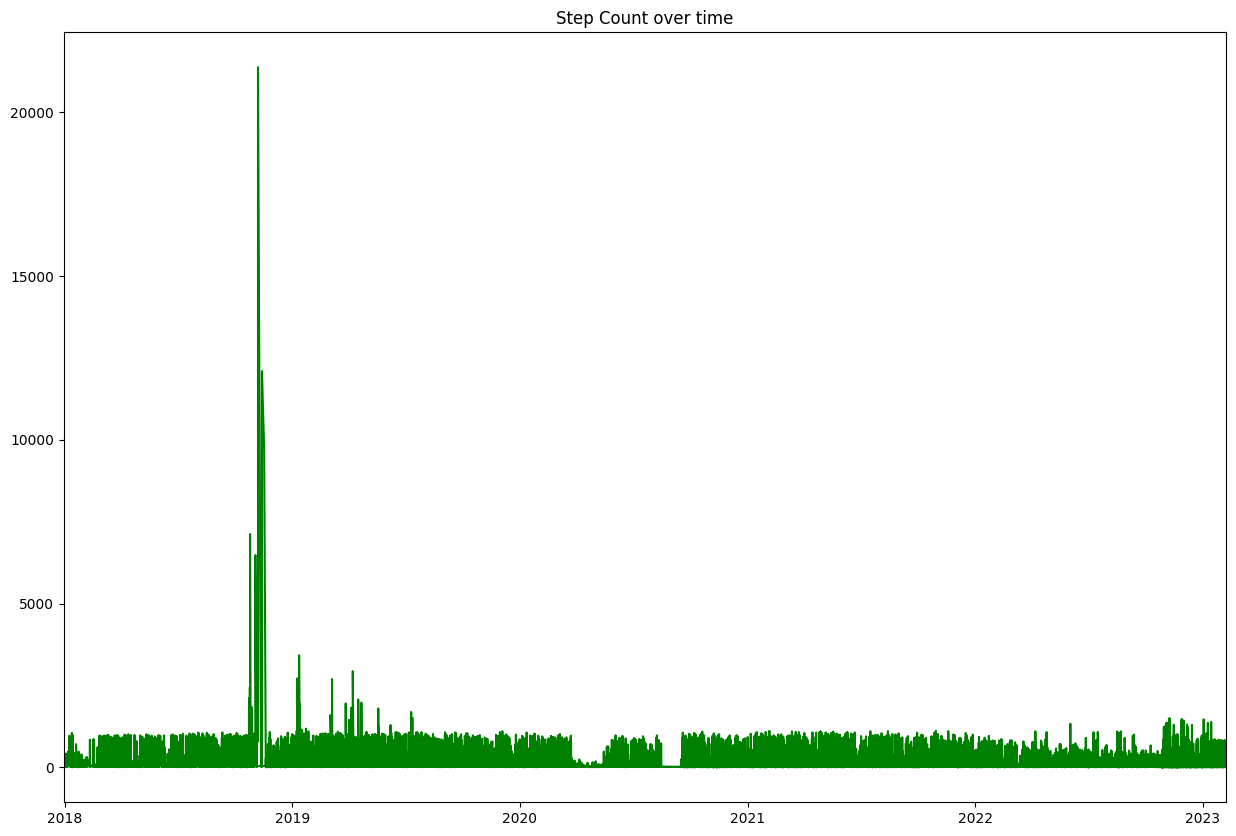

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
# slice df 
tmp = df[df.type == "HKQuantityTypeIdentifierStepCount"]
tmp.loc[:, "value"] = tmp.value.astype(float)
# get date
dates, min_date, max_date = get_min_max_date_and_datetime_array(tmp)
ax.plot(dates, tmp['value'], color='green')
ax.set_xlim([min_date-datetime.timedelta(days=1), max_date+ datetime.timedelta(days=1)])
ax.set_title('Step Count over time')
plt.show()

^ odd results here. definetly expected to be higher. to check with actual data

/tmp/ipykernel_57009/2535142621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[:, "value"] = tmp.value.astype(float)
/tmp/ipykernel_57009/2535142621.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tmp.loc[:, "value"] = tmp.value.astype(float)


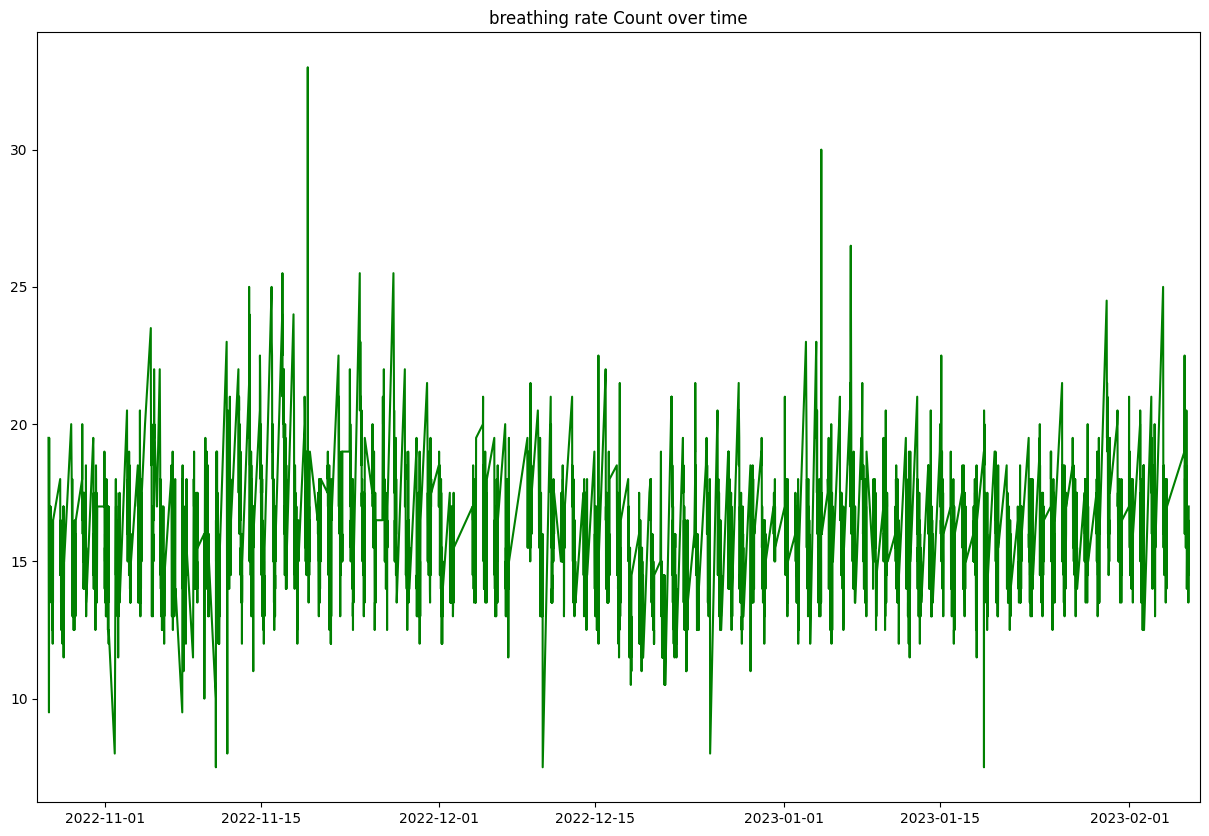

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
# slice df 
tmp = df[df.type == "HKQuantityTypeIdentifierRespiratoryRate"]
tmp.loc[:, "value"] = tmp.value.astype(float)
# get date
dates, min_date, max_date = get_min_max_date_and_datetime_array(tmp)
ax.plot(dates, tmp['value'], color='green')
ax.set_xlim([min_date-datetime.timedelta(days=1), max_date+ datetime.timedelta(days=1)])
ax.set_title('breathing rate Count over time')
plt.show()

/tmp/ipykernel_57009/1231039059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[:, "value"] = tmp.value.astype(float)
/tmp/ipykernel_57009/1231039059.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tmp.loc[:, "value"] = tmp.value.astype(float)


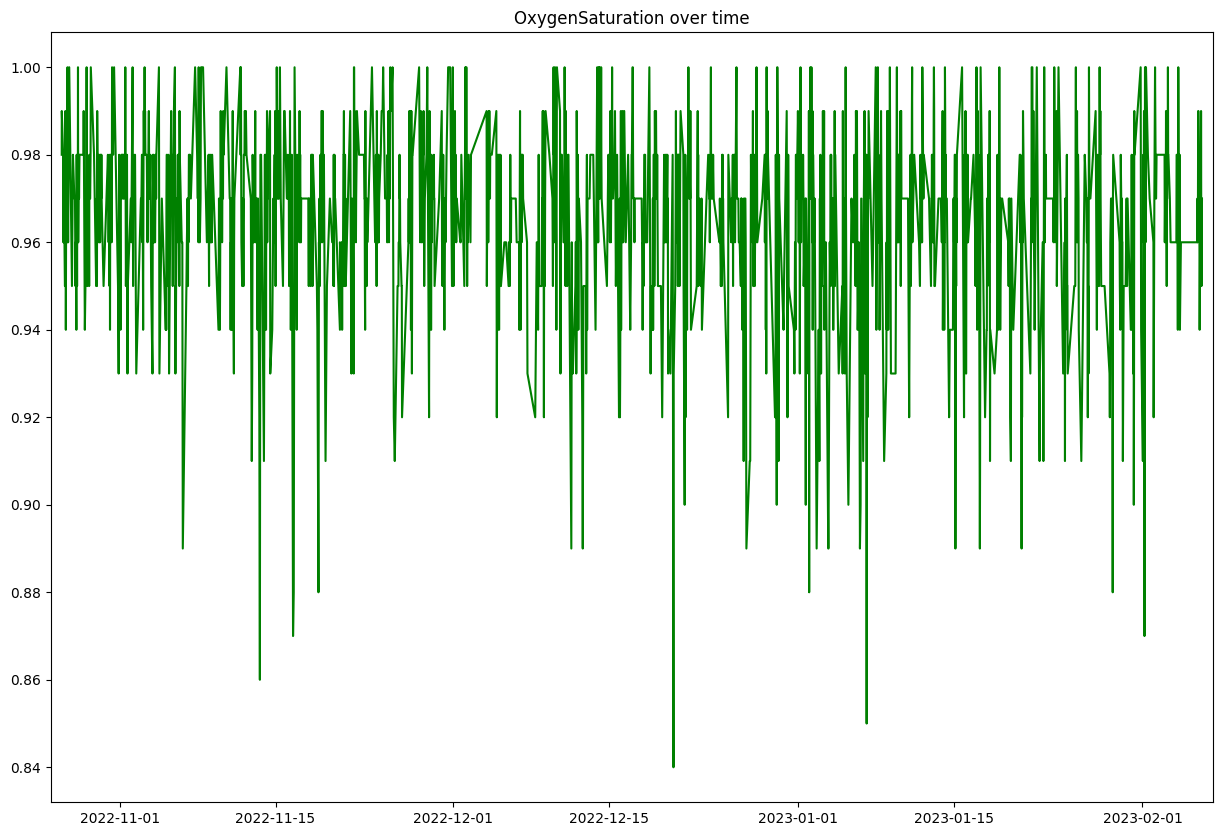

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
# slice df 
tmp = df[df.type == "HKQuantityTypeIdentifierOxygenSaturation"]
tmp.loc[:, "value"] = tmp.value.astype(float)
# get date
dates, min_date, max_date = get_min_max_date_and_datetime_array(tmp)
ax.plot(dates, tmp['value'], color='green')
ax.set_xlim([min_date-datetime.timedelta(days=1), max_date+ datetime.timedelta(days=1)])
ax.set_title('OxygenSaturation over time')
plt.show()

/tmp/ipykernel_57009/1040932037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[:, "value"] = tmp.value.astype(float)
/tmp/ipykernel_57009/1040932037.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tmp.loc[:, "value"] = tmp.value.astype(float)


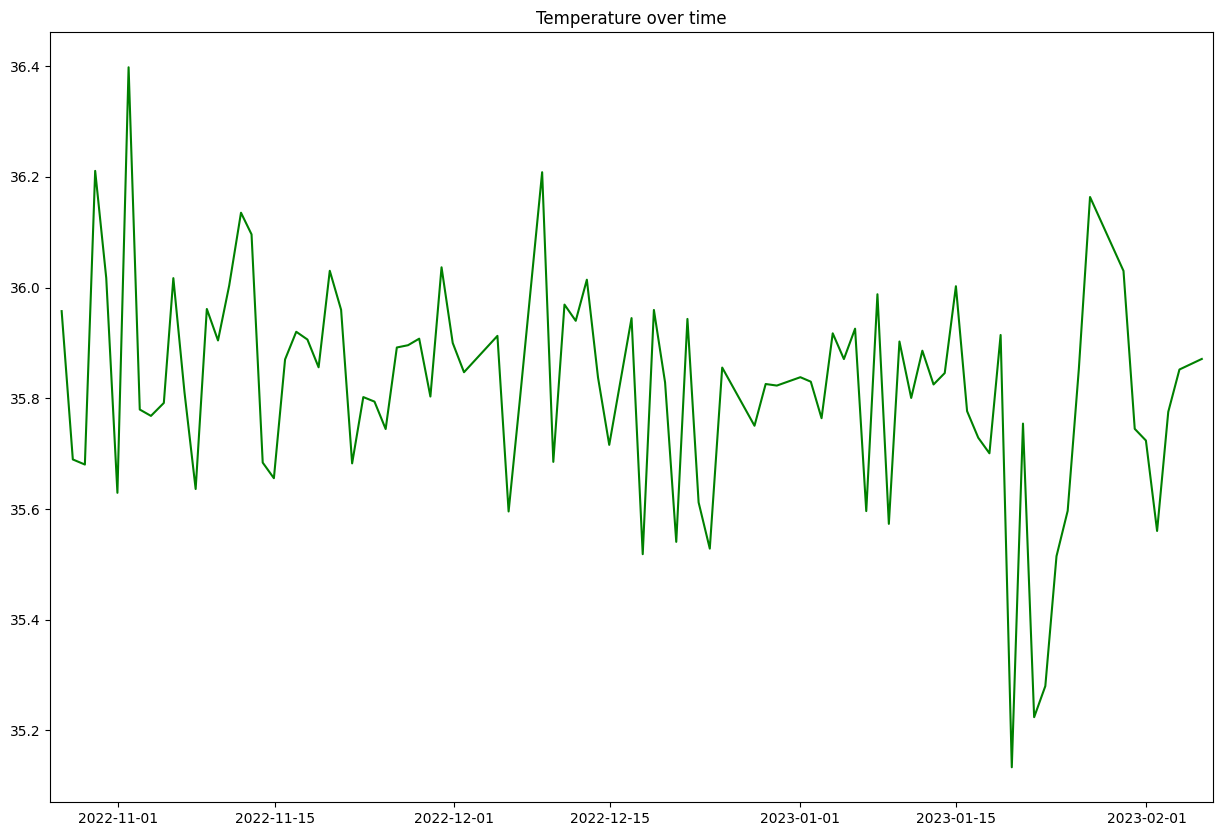

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
# slice df 
tmp = df[df.type == "HKQuantityTypeIdentifierAppleSleepingWristTemperature"]
tmp.loc[:, "value"] = tmp.value.astype(float)
# get date
dates, min_date, max_date = get_min_max_date_and_datetime_array(tmp)
ax.plot(dates, tmp['value'], color='green')
ax.set_xlim([min_date-datetime.timedelta(days=1), max_date+ datetime.timedelta(days=1)])
ax.set_title('Temperature over time')
plt.show()

# sleep

HKCategoryTypeIdentifierSleepAnalysis
HKQuantityTypeIdentifierDietaryCaffeine

ValueError: could not convert string to float: 'HKCategoryValueSleepAnalysisInBed'

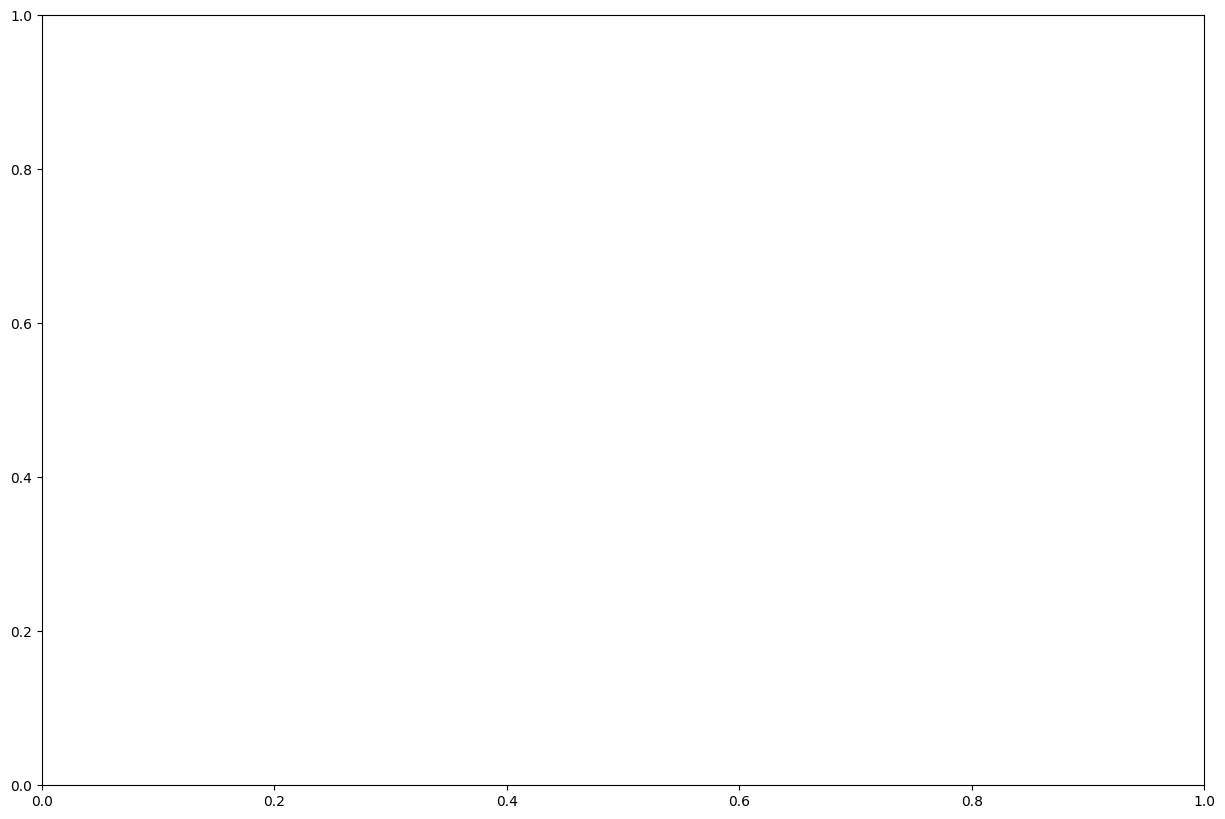

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
# slice df 
tmp = df[df.type == "HKCategoryTypeIdentifierSleepAnalysis"]
tmp.loc[:, "value"] = tmp.value.astype(float)
# get date
dates, min_date, max_date = get_min_max_date_and_datetime_array(tmp)
ax.scatter(dates, tmp['value'], color='green')
ax.set_xlim([min_date-datetime.timedelta(days=1), max_date+ datetime.timedelta(days=1)])
ax.set_title('HKCategoryTypeIdentifierSleepAnalysis over time')
plt.show()

/var/folders/_4/vpd545r96790ls07tvhfkstm0000gn/T/ipykernel_70669/3377096027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[:, "value"] = tmp.value.astype(float)


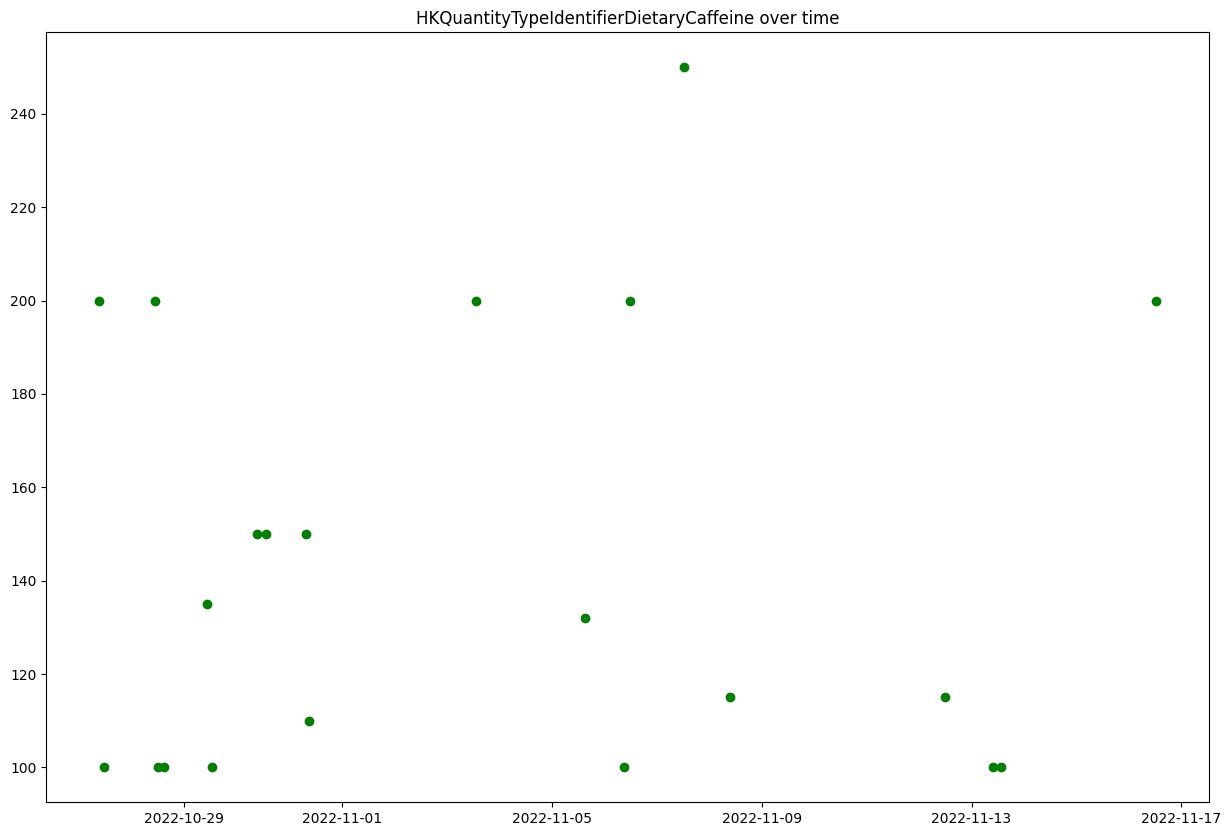

In [19]:

fig, ax = plt.subplots(figsize=(15,10))
# slice df 
tmp = df[df.type == "HKQuantityTypeIdentifierDietaryCaffeine"]
tmp.loc[:, "value"] = tmp.value.astype(float)
# get date
dates, min_date, max_date = get_min_max_date_and_datetime_array(tmp)
ax.scatter(dates, tmp['value'], color='green')
ax.set_xlim([min_date-datetime.timedelta(days=1), max_date+ datetime.timedelta(days=1)])
ax.set_title('HKQuantityTypeIdentifierDietaryCaffeine over time')
plt.show()

**Comments on section 1:**

The results show.


----------

<br>
<font color = 'green'><h2>3. [insert section three title here]</h2></font>

**Comments on section 1:**

The results show.


----------

<br>

<font color = 'green'><h2>4. [insert section four title here]</h2></font>

**Comments on section 1:**

The results show.


----------

<br>

<font color = 'green'><h2>5. [insert section five title here]</h2></font>

**Comments on section 1:**

The results show.


----------